In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import random

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler

In [ ]:
from sklearn.datasets import make_blobs
from keras.layers import LeakyReLU
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam , SGD , Adagrad , Adadelta , Adamax
from keras.utils import to_categorical
from matplotlib import pyplot

In [ ]:
traindf = pd.read_csv('train_age_dataset.csv')
testdf = pd.read_csv('test_age_dataset.csv')

ParserError: ignored

In [ ]:
acc = np.zeros((30,2))

i=0


In [ ]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
view_df = shuffle(traindf, random_state=2)



In [ ]:
view_df.value_counts('age_group')
an = random.randint(11,25)

In [ ]:
a = view_df[view_df['age_group']==1].head(150000)
b=view_df.loc[view_df['age_group']!= 1]
view_df = pd.concat([a,b])
print(view_df.shape)

(267537, 27)


In [ ]:
a = testdf.corr()
a.to_csv('correlation.csv')

In [ ]:

view_df.drop(view_df.columns[[12,]],axis=1)


Unnamed: 0    userId  ...        avgt2  age_group
236640      226607  40556870  ...     0.000000        1.0
9517        290692  54517165  ...     0.000000        1.0
264095      127869   1506239  ...     0.000000        1.0
43729        67314  37252574  ...     0.000000        1.0
166564      436872  53535075  ...   139.000000        1.0
...            ...       ...  ...          ...        ...
182951      528272  37242590  ...   175.850000        2.0
35541        36498    351833  ...   579.921250        4.0
252511      480902  47200678  ...   186.687500        4.0
53922       423952  51822585  ...   190.200000        2.0
100879      448364    209776  ...  2057.705882        3.0

[267537 rows x 26 columns]

In [ ]:
x_y = view_df.to_numpy()
X = x_y[:,:26]
Y = x_y[:,26:]
X=np.asarray(X)
scaler = StandardScaler()
X = scaler.fit_transform(X)
trainX, testX = X[:300000, :], X[300000:, :]
trainy, testy = Y[:300000], Y[300000:]
m = Y.shape[0]

In [ ]:
print(X)

[[-3.06524799e-01 -6.27228724e-02  6.62238132e-02 ...  4.46230230e-01
  -3.29576722e-01 -1.76621868e-01]
 [ 9.10484578e-02  7.00090248e-01  6.62238132e-02 ... -3.42569442e-01
  -3.29576722e-01 -1.76621868e-01]
 [-9.19079816e-01 -2.19651257e+00  2.34000722e+00 ... -3.42569442e-01
  -3.29576722e-01 -1.76621868e-01]
 ...
 [ 1.27108137e+00  3.00305553e-01  6.62238132e-02 ...  2.13639107e+00
   1.61086247e+00 -1.32407566e-03]
 [ 9.17772531e-01  5.52854035e-01  6.62238132e-02 ... -3.42569442e-01
   1.50970869e+00  1.97412855e-03]
 [ 1.06922074e+00 -2.26735341e+00  6.62238132e-02 ... -3.38031693e-01
  -3.23398064e-01  1.75554445e+00]]


In [ ]:
print(Y)

[[1.]
 [1.]
 [1.]
 ...
 [4.]
 [2.]
 [3.]]


In [ ]:
y = to_categorical(trainy)
print(y.shape)

IndexError: ignored

In [ ]:

X_test = testdf.to_numpy()
X_test = (X_test-(np.mean(X_test,axis=0)))/np.std(X_test,axis=0)

In [ ]:
from sklearn.utils import class_weight
y_ints = [y1.argmax() for y1 in y]

class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(y_ints), 
                y_ints)
print(class_weights)

NameError: ignored

In [ ]:
class_weight1={0:0,
              1:1,
              2:2,
              3:1.88,
              4:2.5}

In [ ]:
model = Sequential()
model.add(Dense(69, input_dim=26,activation = 'relu' , kernel_initializer='GlorotUniform'))

model.add(BatchNormalization(axis=-1))
model.add(Dense(58,activation = 'relu',kernel_initializer='GlorotUniform'))
model.add(BatchNormalization(axis=-1))
model.add(Dense(34,activation = 'relu',kernel_initializer='GlorotUniform'))
model.add(BatchNormalization(axis=-1))
model.add(Dense(39,activation = 'relu',kernel_initializer='GlorotUniform'))

model.add(BatchNormalization(axis=-1))
model.add(Dense(20,activation = 'relu',kernel_initializer='GlorotUniform'))

model.add(Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 69)                1863      
_________________________________________________________________
batch_normalization_35 (Batc (None, 69)                276       
_________________________________________________________________
dense_87 (Dense)             (None, 58)                4060      
_________________________________________________________________
dense_88 (Dense)             (None, 34)                2006      
_________________________________________________________________
dense_89 (Dense)             (None, 39)                1365      
_________________________________________________________________
batch_normalization_36 (Batc (None, 39)                156       
_________________________________________________________________
dense_90 (Dense)             (None, 20)              

In [ ]:
opt = Adamax(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'],)

In [ ]:
history = model.fit(trainX,y,epochs=20, class_weight= class_weight1)

Epoch 1/20
9375/9375 [==============================] - 14s 1ms/step - loss: 1.2408 - accuracy: 0.6572
Epoch 2/20
9375/9375 [==============================] - 14s 1ms/step - loss: 1.1472 - accuracy: 0.6770
Epoch 3/20
9375/9375 [==============================] - 14s 1ms/step - loss: 1.1176 - accuracy: 0.6838
Epoch 4/20
9375/9375 [==============================] - 14s 1ms/step - loss: 1.0976 - accuracy: 0.6882
Epoch 5/20
9375/9375 [==============================] - 14s 1ms/step - loss: 1.0804 - accuracy: 0.6924
Epoch 6/20
9375/9375 [==============================] - 14s 1ms/step - loss: 1.0627 - accuracy: 0.6995
Epoch 7/20
9375/9375 [==============================] - 14s 1ms/step - loss: 1.0473 - accuracy: 0.7055
Epoch 8/20
9375/9375 [==============================] - 14s 1ms/step - loss: 1.0336 - accuracy: 0.7100
Epoch 9/20
9375/9375 [==============================] - 14s 2ms/step - loss: 1.0225 - accuracy: 0.7139
Epoch 10/20
9375/9375 [==============================] - 13s 1ms/step - l

In [ ]:
_, train_acc = model.evaluate(trainX, y,verbose= 0 )
print(train_acc)

0.7458566427230835


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:

yhat_probs = model.predict(testX, verbose=0)

yhat_probs = yhat_probs[:, 0]
yhat_classes = np.argmax(model.predict(testX), axis=-1)
accuracy = accuracy_score(testy, yhat_classes)
print( accuracy)
precision = precision_score(testy, yhat_classes,average= 'weighted')
print( precision)
recall = recall_score(testy, yhat_classes , average= 'weighted')
print( recall)
f1 = f1_score(testy, yhat_classes, average= 'weighted')
print( f1)

0.6724958570921817
0.7295601349327048
0.6724958570921817
0.6740694942335785


In [ ]:
yn = model.predict(trainX)
a2 = np.argmax(yn,axis=1)
a2 = pd.DataFrame(a2)
print(a2.value_counts())
cm =confusion_matrix(rbf_predict,a2)

1    158374
2     69684
4     66756
3      5186
dtype: int64


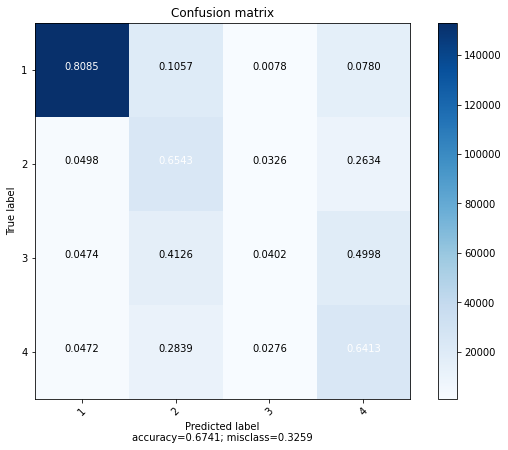

In [ ]:
plot_confusion_matrix(cm,[1,2,3,4],normalize= True)

In [ ]:
Y_test=model.predict(X_test, )

In [ ]:
print(Y_test)

[[0.00000000e+00 1.00000000e+00 4.31929798e-15 7.72867335e-15
  6.58570598e-18]
 [5.60407880e-32 1.00000000e+00 2.24582536e-14 1.71237052e-10
  5.51504155e-12]
 [3.32618570e-34 1.00000000e+00 2.53874469e-18 9.45079570e-20
  1.91188804e-21]
 ...
 [3.38966214e-13 4.03863269e-05 1.48405961e-04 4.59521025e-01
  5.40290177e-01]
 [5.66650520e-32 1.00000000e+00 1.18275505e-08 2.21754403e-11
  1.45798998e-10]
 [4.30585589e-23 9.99999881e-01 1.53881317e-07 7.56144175e-11
  1.42226781e-08]]


In [ ]:
a=np.argmax(Y_test,axis=1)

In [ ]:

print(Y_test.shape)


(54320, 5)


In [ ]:
print(np.argmax(Y_test))


1


In [ ]:
print(a)

[1 1 1 ... 4 1 1]


In [ ]:
a=pd.DataFrame(a)
print(a.value_counts())

1    30666
2    13223
4     5586
3     4845
dtype: int64


In [ ]:
a.to_csv("predictions1.csv", index = False)